In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# i didn't downloaded given dataset cauz its same as in seaborn. So importing using seaborn

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.shape

(144, 5)

__CLEANING DATA, REMOVING OUTLIERS__

In [4]:
# finding null values
df.isnull().sum() *100 / len(df)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [5]:
# finding percentage of null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

<Axes: ylabel='sepal_length'>

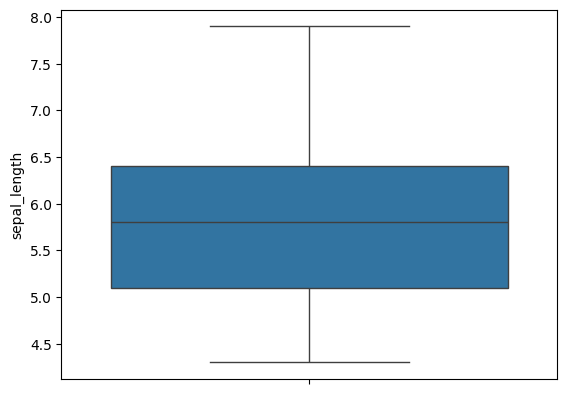

In [7]:
sns.boxplot(data=df, y='sepal_length')

<Axes: ylabel='sepal_width'>

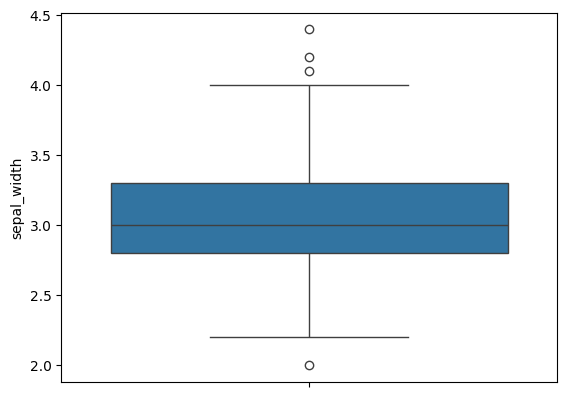

In [8]:
sns.boxplot(data=df, y='sepal_width')

<Axes: ylabel='petal_length'>

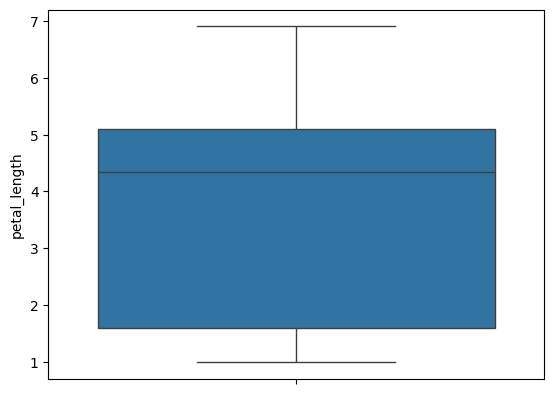

In [9]:
sns.boxplot(data=df, y='petal_length')

<Axes: ylabel='petal_length'>

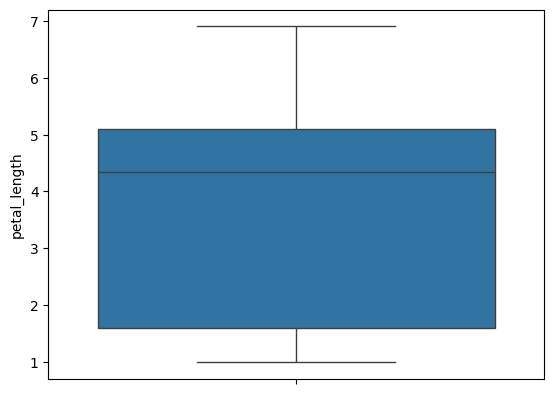

In [10]:
sns.boxplot(data=df, y='petal_length')


<Axes: ylabel='species'>

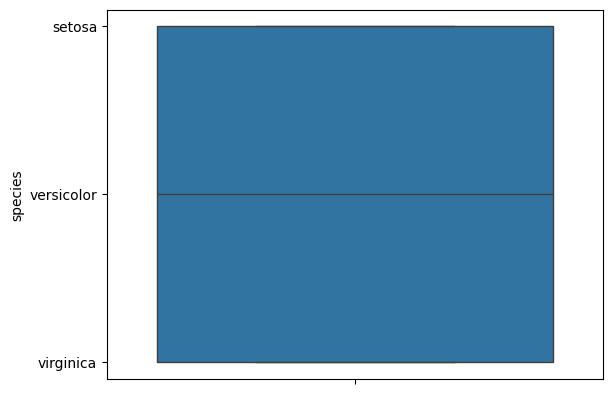

In [11]:
sns.boxplot(data=df, y='species')

Outliers are only in SEPAL WIDTH, So we need to remove outliers from it.

In [12]:
df = df[(df['sepal_width']>2) & (df['sepal_width'] <4)]

<Axes: ylabel='sepal_width'>

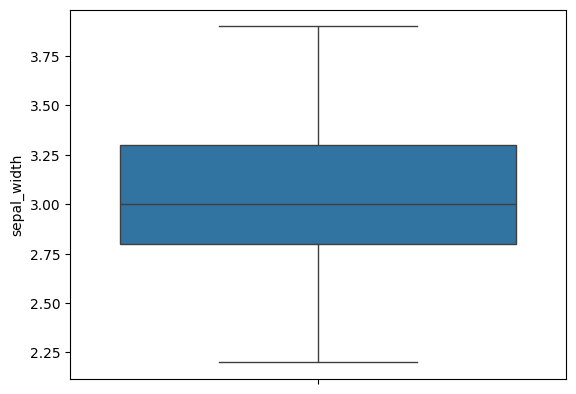

In [13]:
sns.boxplot(data=df, y='sepal_width')

<Axes: ylabel='sepal_length'>

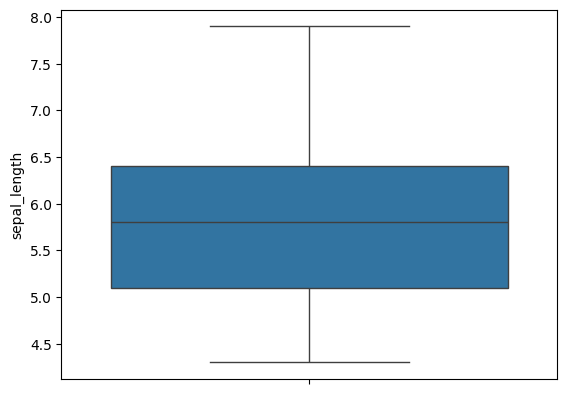

In [14]:
sns.boxplot(data=df, y='sepal_length')

In [15]:
df.duplicated().sum()

1

In [16]:
df_duplicates = df[df.duplicated()]
df_duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [17]:
df.drop_duplicates(inplace=True)

__So our data is cleaned now__

<Axes: >

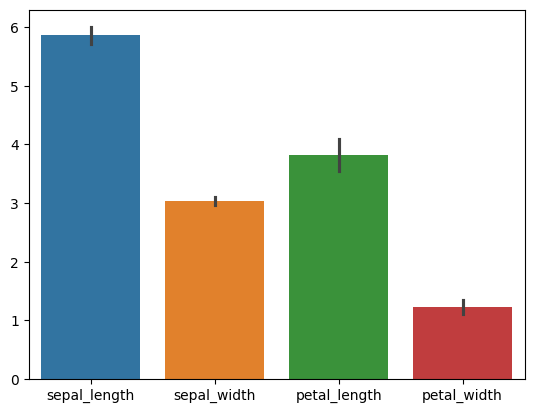

In [18]:
sns.barplot(data=df)

<Axes: ylabel='Count'>

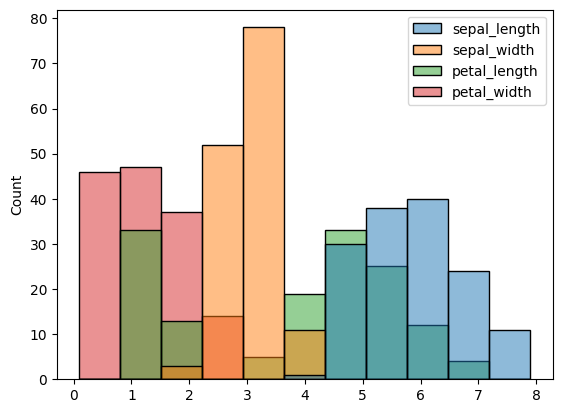

In [19]:
sns.histplot(data=df)

<Axes: >

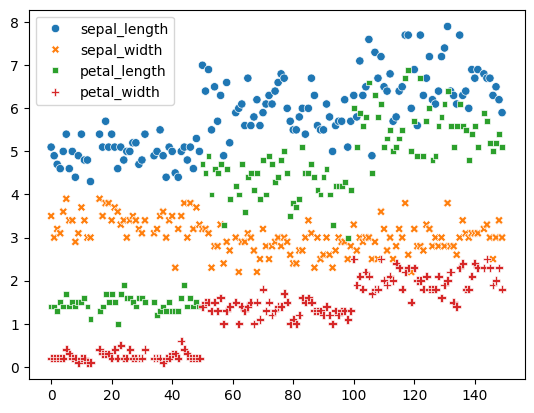

In [20]:
sns.scatterplot(data=df)

# __Applying DECISSION TREE Model__

In [21]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [22]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

In [23]:
# y = pd.get_dummies(y, columns='species')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [25]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(X_test)

In [27]:
df.sample(29)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
124,6.7,3.3,5.7,2.1,virginica
70,5.9,3.2,4.8,1.8,versicolor
36,5.5,3.5,1.3,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
120,6.9,3.2,5.7,2.3,virginica
9,4.9,3.1,1.5,0.1,setosa
61,5.9,3.0,4.2,1.5,versicolor
23,5.1,3.3,1.7,0.5,setosa


__Predicting Iris Species Based on Sepal and Petal__

In [28]:
model.predict([[1.3,1.5,5.1, 1.8]])

c:\Users\baigs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [29]:
model.predict([[3.0,1.0,4.1, 1.1]])

c:\Users\baigs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

__Evaluation__

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
print( "Accuracy:", accuracy_score(y_test, y_pred))
print("precision: ",precision_score(y_test, y_pred, average='weighted'))
print("recall: ",  recall_score(y_test, y_pred, average='weighted' ))
print("F1 score: ",  f1_score(y_test, y_pred, average='weighted' ))


Accuracy: 0.896551724137931
precision:  0.8978952082400359
recall:  0.896551724137931
F1 score:  0.895566502463054
